In [1]:
!pip install cvxopt

     |████████████████████████████████| 11.6 MB 9.2 MB/s eta 0:00:01


In [87]:

import numpy as np
import scipy.io as io
import pandas as pd
from cvxopt import matrix, solvers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 2a



In [13]:

def HardMarg(X, y):
    """Hard margin SVM.
    Args:
        X (array): Data of shape (d, n)
        y (array): Target of shape (n, 1)
    Returns:
        b (array): Weights of shape (d, 1)
        b0 (float): Scalar offset
    """
    X, y = X.T, y.astype(float)
    n, d = X.shape
    solver_thresh = 1e-5
    
    K = X * y

    p = matrix(K@K.T)
    q = matrix(-np.ones((n, 1)))
    G = matrix(-np.identity(n))
    h = matrix(np.zeros(n))
    A = matrix(y.T)
    b_ = matrix(0.)

    solQP = solvers.qp(p, q, G, h, A, b_)
    alphas = np.array(solQP['x'])

    b = ((y * alphas).T @ X).reshape(-1,1)
    
    non_zero_params = (alphas > solver_thresh).ravel()
    b0 = (y[non_zero_params] - X[non_zero_params] @ b).mean()

    return b, b0

# 2b

In [14]:


def SoftMarg(X, y, gamma):
    """Soft margin SVM.
    Args:
        X (array): Data of shape (d, n)
        y (array): Target of shape (n, 1)
        gamma (float): Constant
    Returns:
        b (array): Weights of shape (d, 1)
        b0 (float): Scalar bias
    """
    X, y = X.T, y.astype(float)
    n, d = X.shape
    solver_thresh = 1e-5
    
    K = X * y

    p = matrix(K@K.T)
    q = matrix(-np.ones((n, 1)))
    G = matrix(np.vstack([-np.identity(n), np.identity(n)]))
    h = matrix(np.hstack([np.zeros(n), gamma * np.ones(n)]))
    A = matrix(y.T)
    b_ = matrix(0.)

    solQP = solvers.qp(p, q, G, h, A, b_)
    alphas = np.array(solQP['x'])

    b = ((y * alphas).T @ X).reshape(-1,1)
    
    non_zero_params = (alphas > solver_thresh).ravel()
    b0 = (y[non_zero_params] - X[non_zero_params] @ b).mean()

    return b, b0

# 2c

In [15]:


def classify(X, b, b0):
    """Classification using weights b and bias b0.
    Args:
        X (array): Data of shape (d, m)
        b (array): Weights of shape (d, 1)
        b0 (float): Scalar bias
    Returns:
        y_hat (array): Predicted labels of shape (m, 1)
    """
    y_hat = np.sign(X.T @ b + b0)
    return y_hat

# 2d

     pcost       dcost       gap    pres   dres
 0: -2.1790e+01 -5.7971e+01  2e+02  1e+01  2e+00
 1: -6.0912e+01 -9.5753e+01  8e+01  5e+00  1e+00
 2: -1.4492e+02 -1.8392e+02  8e+01  5e+00  1e+00
 3: -1.1763e+03 -1.2198e+03  1e+02  4e+00  1e+00
 4: -2.0113e+03 -2.1980e+03  3e+02  4e+00  9e-01
 5: -3.6889e+03 -4.4448e+03  1e+03  4e+00  9e-01
 6: -6.4580e+03 -8.4829e+03  2e+03  2e+00  5e-01
 7: -7.2971e+03 -7.7766e+03  5e+02  3e-01  7e-02
 8: -7.3263e+03 -7.3324e+03  7e+00  4e-03  8e-04
 9: -7.3266e+03 -7.3266e+03  7e-02  4e-05  8e-06
10: -7.3266e+03 -7.3266e+03  7e-04  4e-07  8e-08
11: -7.3266e+03 -7.3266e+03  7e-06  4e-09  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.7657e+01 -5.1542e+01  3e+02  4e+00  7e-16
 1: -1.1443e+01 -4.0480e+01  3e+01  6e-16  7e-16
 2: -1.3084e+01 -1.6161e+01  3e+00  1e-15  5e-16
 3: -1.4548e+01 -1.5222e+01  7e-01  2e-15  4e-16
 4: -1.4832e+01 -1.5045e+01  2e-01  1e-15  4e-16
 5: -1.4917e+01 -1.4965e+01  5e-02  1e-15  4e-1

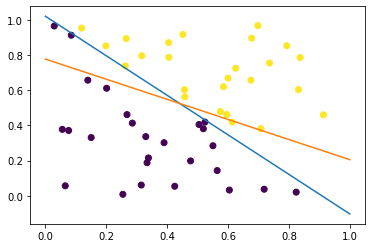

In [97]:
def accuracy(preds, labels):
    preds, labels = preds.ravel(), labels.ravel()
    return (preds==labels).sum()/len(labels)

In [102]:
##Linear Dataset

data = io.loadmat('../input/linear/linear_new.mat')
X_train = data['X']
y_train = data['y']
X_test = data['Xtest']
y_test = data['ytest']
bh, b0h = HardMarg(X_train, y_train)
bs, b0s = SoftMarg(X_train, y_train,0.5)

     pcost       dcost       gap    pres   dres
 0: -2.1790e+01 -5.7971e+01  2e+02  1e+01  2e+00
 1: -6.0912e+01 -9.5753e+01  8e+01  5e+00  1e+00
 2: -1.4492e+02 -1.8392e+02  8e+01  5e+00  1e+00
 3: -1.1763e+03 -1.2198e+03  1e+02  4e+00  1e+00
 4: -2.0113e+03 -2.1980e+03  3e+02  4e+00  9e-01
 5: -3.6889e+03 -4.4448e+03  1e+03  4e+00  9e-01
 6: -6.4580e+03 -8.4829e+03  2e+03  2e+00  5e-01
 7: -7.2971e+03 -7.7766e+03  5e+02  3e-01  7e-02
 8: -7.3263e+03 -7.3324e+03  7e+00  4e-03  8e-04
 9: -7.3266e+03 -7.3266e+03  7e-02  4e-05  8e-06
10: -7.3266e+03 -7.3266e+03  7e-04  4e-07  8e-08
11: -7.3266e+03 -7.3266e+03  7e-06  4e-09  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.7657e+01 -5.1542e+01  3e+02  4e+00  7e-16
 1: -1.1443e+01 -4.0480e+01  3e+01  6e-16  7e-16
 2: -1.3084e+01 -1.6161e+01  3e+00  1e-15  5e-16
 3: -1.4548e+01 -1.5222e+01  7e-01  2e-15  4e-16
 4: -1.4832e+01 -1.5045e+01  2e-01  1e-15  4e-16
 5: -1.4917e+01 -1.4965e+01  5e-02  1e-15  4e-1

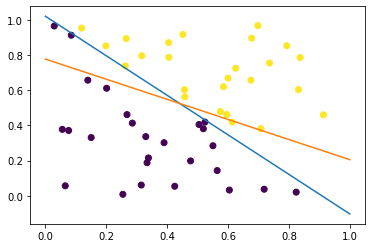

,HardMargin train error,HardMargin test error,SoftMargin train error,SoftMargin test error
0,0.0,0.034773,0.058824,0.105374


In [100]:
x1=np.linspace(0,1)
x2=-(bh[0:1,]*x1+b0h)/bh[1:2,]
x3=np.linspace(0,1)
x4=-(bs[0:1,]*x3+b0s)/bs[1:2,]
plt.plot(x1.ravel(),x2.ravel())
plt.plot(x3.ravel(),x4.ravel())
plt.scatter(X_train[0],X_train[1],c=classify(X_train,bh,b0h))
plt.show()

ytrainpred_h = classify(X_train, bh, b0h)
trainerr_h=1-accuracy(ytrainpred_h,y_train)

ytestpred_h = classify(X_test, bh, b0h)
testerr_h=1-accuracy(ytestpred_h,y_test)

ytrainpred_s = classify(X_train, bs, b0s)
trainerr_s=1-accuracy(ytrainpred_s,y_train)

ytestpred_s = classify(X_test, bs, b0s)
testerr_s=1-accuracy(ytestpred_s,y_test)

df=pd.DataFrame([[trainerr_h,testerr_h,trainerr_s,testerr_s]],columns=["HardMargin train error","HardMargin test error","SoftMargin train error","SoftMargin test error"])
df

In [104]:
##NoisyLinear Dataset

data = io.loadmat('../input/stat441a3/noisylinear_new_1.mat')
X_train = data['X']
y_train = data['y']
X_test = data['Xtest']
y_test = data['ytest']
bh, b0h = HardMarg(X_train, y_train)
bs, b0s = SoftMarg(X_train, y_train,0.5)

     pcost       dcost       gap    pres   dres
 0: -5.3729e+01 -1.5333e+02  4e+02  1e+01  3e+00
 1: -2.7560e+02 -4.3654e+02  2e+02  8e+00  2e+00
 2: -1.1780e+03 -1.3100e+03  1e+02  6e+00  1e+00
 3: -4.3414e+03 -4.7000e+03  4e+02  6e+00  1e+00
 4: -2.5700e+04 -2.7029e+04  1e+03  6e+00  1e+00
 5: -1.1798e+05 -1.2300e+05  5e+03  5e+00  1e+00
 6: -7.5903e+05 -7.8416e+05  3e+04  5e+00  1e+00
 7: -1.2686e+07 -1.2894e+07  2e+05  5e+00  1e+00
 8: -7.0517e+08 -7.0654e+08  1e+06  5e+00  1e+00
 9: -3.4635e+11 -3.4638e+11  4e+07  5e+00  1e+00
10: -3.4685e+11 -3.4688e+11  4e+07  5e+00  1e+00
11: -3.6612e+11 -3.6615e+11  4e+07  5e+00  1e+00
12: -4.9220e+11 -4.9225e+11  5e+07  5e+00  1e+00
13: -6.1072e+11 -6.1077e+11  5e+07  5e+00  1e+00
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres
 0: -4.0301e+01 -1.1546e+02  9e+02  5e+00  2e-15
 1: -2.0110e+01 -8.9991e+01  1e+02  4e-01  1e-15
 2: -1.8976e+01 -2.8278e+01  9e+00  6e-16  1e-15
 3: -2.1906e+01 -2.4477e+01  3e+00  1

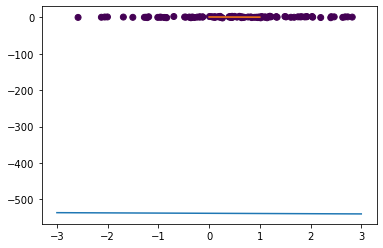

,HardMargin train error,HardMargin test error,SoftMargin train error,SoftMargin test error
0,0.49505,0.499444,0.207921,0.268076


In [109]:
x1=np.linspace(-3,3)
x2=-(bh[0:1,]*x1+b0h)/bh[1:2,]
x3=np.linspace(0,1)
x4=-(bs[0:1,]*x3+b0s)/bs[1:2,]
plt.plot(x1.ravel(),x2.ravel())
plt.plot(x3.ravel(),x4.ravel())
plt.scatter(X_train[0],X_train[1],c=classify(X_train,bh,b0h))
plt.show()

ytrainpred_h = classify(X_train, bh, b0h)
trainerr_h=1-accuracy(ytrainpred_h,y_train)

ytestpred_h = classify(X_test, bh, b0h)
testerr_h=1-accuracy(ytestpred_h,y_test)

ytrainpred_s = classify(X_train, bs, b0s)
trainerr_s=1-accuracy(ytrainpred_s,y_train)

ytestpred_s = classify(X_test, bs, b0s)
testerr_s=1-accuracy(ytestpred_s,y_test)

df=pd.DataFrame([[trainerr_h,testerr_h,trainerr_s,testerr_s]],columns=["HardMargin train error","HardMargin test error","SoftMargin train error","SoftMargin test error"])
df

In [110]:
##Quadratic Dataset

data = io.loadmat('../input/stat441a3/quadratic_new.mat')
X_train = data['X']
y_train = data['y']
X_test = data['Xtest']
y_test = data['ytest']
bh, b0h = HardMarg(X_train, y_train)
bs, b0s = SoftMarg(X_train, y_train,0.5)

     pcost       dcost       gap    pres   dres
 0: -3.0793e+01 -7.2091e+01  4e+02  2e+01  2e+00
 1: -7.2044e+01 -1.1384e+02  2e+02  1e+01  1e+00
 2: -2.0921e+02 -2.5889e+02  2e+02  9e+00  1e+00
 3: -1.1707e+03 -1.2445e+03  3e+02  8e+00  1e+00
 4: -8.4857e+03 -8.7005e+03  5e+02  8e+00  1e+00
 5: -5.3793e+04 -5.4814e+04  2e+03  8e+00  1e+00
 6: -1.0200e+05 -1.0601e+05  6e+03  8e+00  1e+00
 7: -2.3461e+05 -2.5901e+05  3e+04  8e+00  1e+00
 8: -5.8212e+05 -7.2155e+05  2e+05  7e+00  9e-01
 9: -1.0519e+06 -1.3536e+06  3e+05  2e+00  3e-01
10: -1.0842e+06 -1.0925e+06  9e+03  6e-02  8e-03
11: -1.0843e+06 -1.0844e+06  9e+01  6e-04  8e-05
12: -1.0843e+06 -1.0843e+06  9e-01  6e-06  8e-07
13: -1.0843e+06 -1.0843e+06  9e-03  6e-08  8e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3537e+01 -9.0500e+01  6e+02  4e+00  1e-15
 1: -1.3065e+01 -6.5852e+01  7e+01  2e-01  8e-16
 2: -1.3499e+01 -2.2009e+01  9e+00  2e-02  6e-16
 3: -1.6164e+01 -1.7779e+01  2e+00  3e-03  5e-1

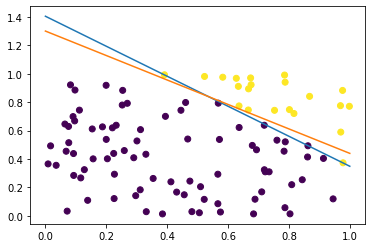

,HardMargin train error,HardMargin test error,SoftMargin train error,SoftMargin test error
0,0.0,0.035595,0.009901,0.03782


In [113]:
x1=np.linspace(0,1)
x2=-(bh[0:1,]*x1+b0h)/bh[1:2,]
x3=np.linspace(0,1)
x4=-(bs[0:1,]*x3+b0s)/bs[1:2,]
plt.plot(x1.ravel(),x2.ravel())
plt.plot(x3.ravel(),x4.ravel())
plt.scatter(X_train[0],X_train[1],c=classify(X_train,bh,b0h))
plt.show()

ytrainpred_h = classify(X_train, bh, b0h)
trainerr_h=1-accuracy(ytrainpred_h,y_train)

ytestpred_h = classify(X_test, bh, b0h)
testerr_h=1-accuracy(ytestpred_h,y_test)

ytrainpred_s = classify(X_train, bs, b0s)
trainerr_s=1-accuracy(ytrainpred_s,y_train)

ytestpred_s = classify(X_test, bs, b0s)
testerr_s=1-accuracy(ytestpred_s,y_test)

df=pd.DataFrame([[trainerr_h,testerr_h,trainerr_s,testerr_s]],columns=["HardMargin train error","HardMargin test error","SoftMargin train error","SoftMargin test error"])
df